In [50]:
import sys, os, csv, glob
import matplotlib.pyplot as plt 
import numpy as np

In [51]:
folder_n = 'C:/Users/Bum/Desktop/MMMIL/RF/RF_data/07_24_1' # path of data_files 
fn = glob.glob(folder_n + '/*')

In [71]:
data = []
with open(fn[0],'r', encoding='utf-8') as f:
    reader = csv.reader(f) 
    for txt in reader :
        data.append(txt)

In [74]:
data_r = np.array(data, dtype='float64')*5/32768
print(data_r.shape)
data_s = data_r[0][:24000] # data selection

(3, 131072)


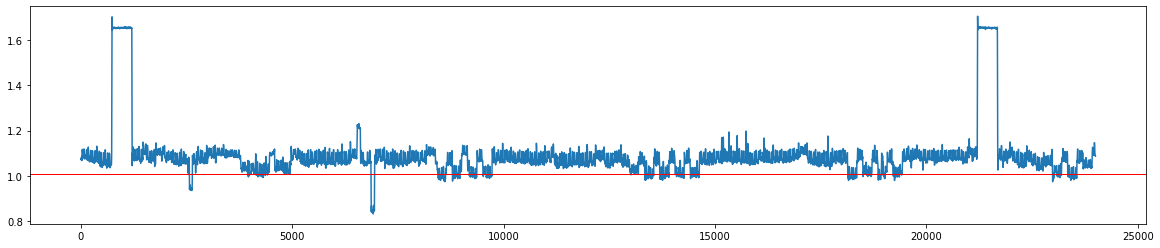

In [79]:
plt.rcParams["figure.figsize"] = (20,4)
plt.plot(data_s) # 1_period_of_signal
plt.axhline(y = 1.01, color='r', linewidth=1) # visualizing red line
#plt.ylim(0,1.8)
plt.show()

In [ ]:
np.median(data_s)

In [75]:
def outlier(data, threshold):
    from scipy.special import erfcinv
    from math import sqrt
    
    #c=-1/(sqrt(2)*erfcinv(3/2))
    #mad = c*np.median(abs(data-np.median(data)))
    mad = np.median(abs(data-np.median(data)))

    lower_t = np.median(data)-(3*mad)
    upper_t = np.median(data)+(3*mad)
    outlier_i = np.concatenate((np.where(data > upper_t)[0], np.where(data <lower_t)[0]))
    
    if len(outlier_i) > threshold:
        outlier_d = []
        [outlier_d.append(data[i]) for i in outlier_i]
        return outlier_d
    
    else:
        baseline_d =[] 
        baseline_d_r =[] 
        sig_1 = np.where(data < upper_t)[0]
        [baseline_d.append(data[i]) for i in sig_1]
        sig_2 = np.where(baseline_d > lower_t)[0]
        [baseline_d_r.append(baseline_d[i]) for i in sig_2]
        return baseline_d_r
        
        
        

In [76]:
data_o = outlier(data_s,2500)
data_o2 = outlier(data_o, 50000)
data_o3 = outlier(data_o, 10)

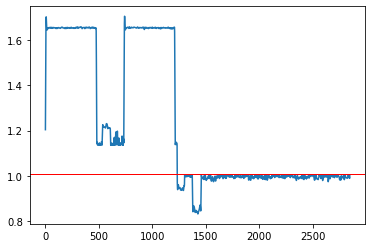

In [77]:
plt.plot(data_o) # 1_period_of_signal
plt.axhline(y = 1.01, color='r', linewidth=1)
#plt.ylim(0,1.8)
plt.show()

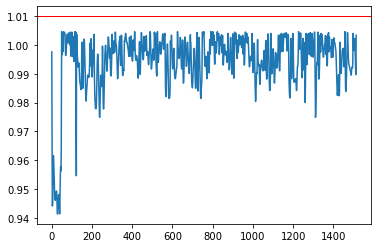

In [78]:
plt.plot(data_o2) # 1_period_of_signal
plt.axhline(y = 1.01, color='r', linewidth=1)
#plt.ylim(0,1.8)
plt.show()

### all_data 

In [51]:
folder_n = 'C:/Users/Bum/Desktop/MMMIL/RF/RF_data/07_24_1' # path of data_files 
fn = glob.glob(folder_n + '/*')

In [80]:
all_data = []
for fn_s in fn:
    data = []
    with open(fn_s,'r', encoding='utf-8') as f:
        reader = csv.reader(f) 
        for txt in reader :
            data.append(txt)
        data_r = np.array(data, dtype='float64')*5/32768
    all_data.append(data_r)

In [147]:
outlier_a = []
outlier_n = []

for i in range(len(all_data)):
    outlier_n = []
    for j in range(len(all_data[i])):
        outlier_i = outlier(all_data[i][j][:24000], 2500)
        outlier_i2 = np.array(outlier(outlier_i, 2500))
        outlier_n.append(np.mean(outlier_i2))
    outlier_a.append(outlier_n)


In [157]:
channel_1 = []
channel_2 = []
channel_3 = []

for i in range(len(outlier_a)):
    channel_1.append(outlier_a[i][0])
    channel_2.append(outlier_a[i][1])
    channel_3.append(outlier_a[i][2])

<ipython-input-163-79e22f295da5>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


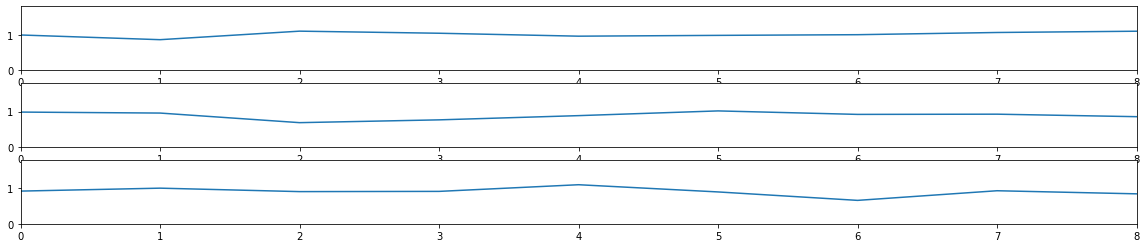

In [163]:
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax1.set(xlim=[0,8],ylim=[0,1.8])
ax1.plot(channel_1)
ax2 = fig.add_subplot(3,1,2)
ax2.set(xlim=[0,8],ylim=[0,1.8])
ax2.plot(channel_2)
ax3 = fig.add_subplot(3,1,3)
ax3.set(xlim=[0,8],ylim=[0,1.8])
ax3.plot(channel_3)
fig.show()